## Exploratory Data Analysis of joined Dataset

Dataset: Outreach_Campaign_Applicants_FinalData.csv"

Importing necessary libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [17]:
# Load the dataset
df = pd.read_csv("Outreach_Campaign_Applicants_FinalData.csv")

# Display basic information
print("✅ Dataset Loaded Successfully!\n")

✅ Dataset Loaded Successfully!



Basic info of dataset

In [18]:
# Check the shape (rows, columns)
print(f"Shape of dataset: {df.shape}\n")

# Display first few rows
print("🔹 Preview of Dataset:")
print(df.head())

# Display column names
print("\n🔹 Column Names:")
print(df.columns.tolist())

# Check data types and non-null counts
print("\n🔹 Data Info:")
print(df.info())

# Check missing values
print("\n🔹 Missing Values per Column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\n🔹 Number of Duplicate Rows:")
print(df.duplicated().sum())

Shape of dataset: (39717, 17)

🔹 Preview of Dataset:
   Reference_ID          Received_At                      University_x  \
0         12345  2023-04-28 12:15:19  Illinois Institute of Technology   
1         12345  2023-04-28 12:15:19  Illinois Institute of Technology   
2         12345  2023-04-28 12:15:19  Illinois Institute of Technology   
3         12345  2023-04-28 13:04:05  Illinois Institute of Technology   
4         12345  2023-04-28 13:04:05  Illinois Institute of Technology   

  Caller_Name   Outcome_1     Remark Campaign_ID Escalation_Required  \
0     Shailja   Connected  No Remark      IANF23                  No   
1     Shailja   Connected  No Remark      IANF23                  No   
2     Shailja   Connected  No Remark      IANF23                  No   
3     Shailja  Reschedule  No Remark      IANF23                  No   
4     Shailja  Reschedule  No Remark      IANF23                  No   

                                     Name        Category  Intake  \


Dataset is fully ready for EDA !

## Performing EDA

Outreach Campaign Performance Analysis

1. Outreach Volume & Timing Trends

In [19]:
# Ensure datetime conversion
df['Received_At'] = pd.to_datetime(df['Received_At'], errors='coerce')

# Extract time features
df['Month'] = df['Received_At'].dt.month_name()
df['Weekday'] = df['Received_At'].dt.day_name()
df['Hour'] = df['Received_At'].dt.hour

# Verify new columns
print(df[['Received_At', 'Month', 'Weekday', 'Hour']].head())


          Received_At  Month Weekday  Hour
0 2023-04-28 12:15:19  April  Friday    12
1 2023-04-28 12:15:19  April  Friday    12
2 2023-04-28 12:15:19  April  Friday    12
3 2023-04-28 13:04:05  April  Friday    13
4 2023-04-28 13:04:05  April  Friday    13


C:\Users\sumai\AppData\Local\Temp\ipykernel_9916\758532592.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_month = sns.barplot(x='Month', y='Reference_ID', data=monthly_outreach, palette='Blues_d')


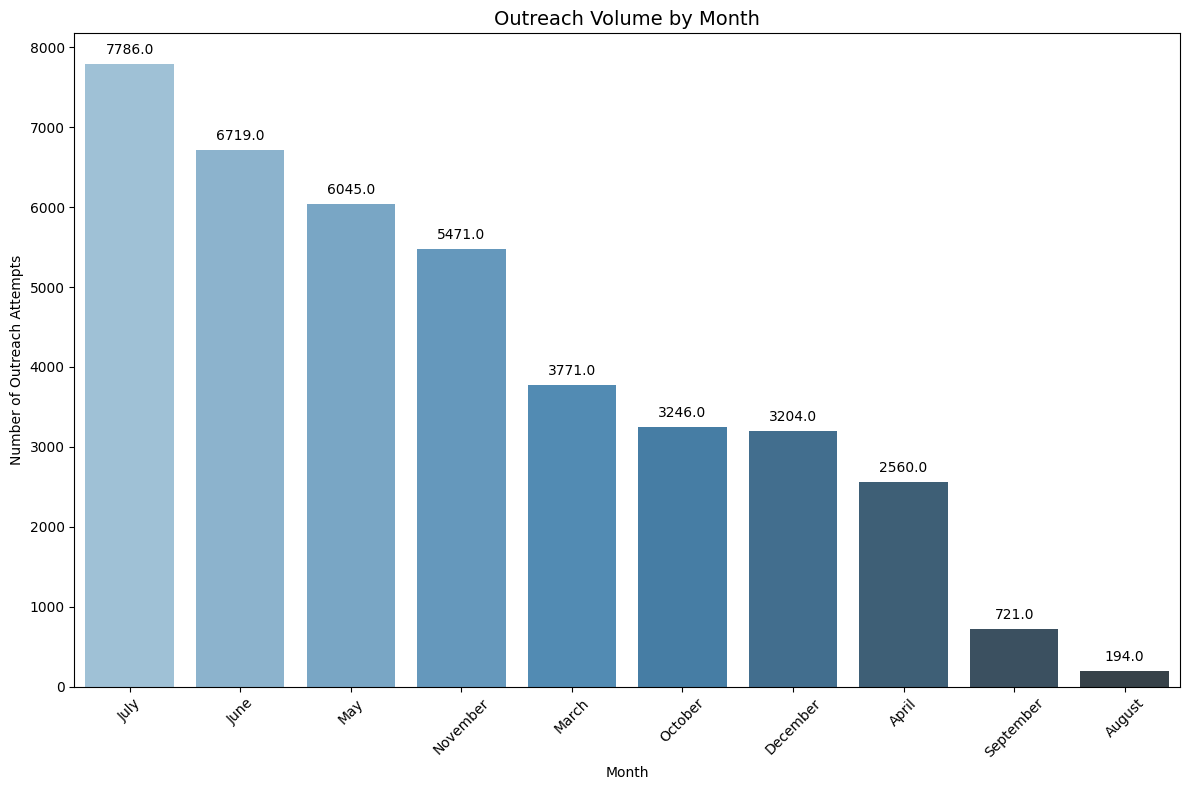

C:\Users\sumai\AppData\Local\Temp\ipykernel_9916\758532592.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_week = sns.barplot(x='Weekday', y='Reference_ID', data=weekday_outreach, palette='Greens_d')


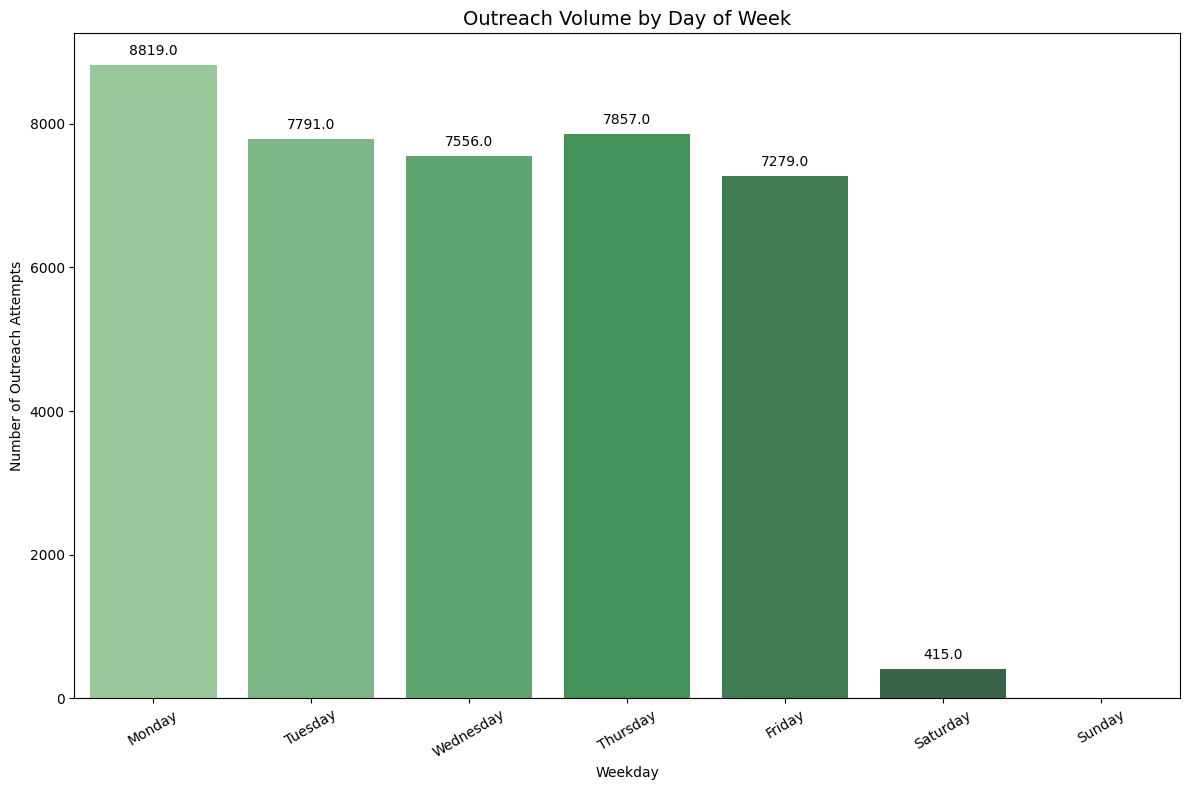

In [20]:
# --- Outreach Volume by Month ---
monthly_outreach = df.groupby('Month')['Reference_ID'].count().reset_index().sort_values('Reference_ID', ascending=False)

plt.figure(figsize=(12,8))
barplot_month = sns.barplot(x='Month', y='Reference_ID', data=monthly_outreach, palette='Blues_d')

# Add values on top of bars
for p in barplot_month.patches:
    height = p.get_height()
    barplot_month.annotate(
        f"{height}",
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        fontsize=10,
        xytext=(0,5),
        textcoords='offset points'
    )

plt.title('Outreach Volume by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Outreach Attempts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# --- Outreach Volume by Weekday ---
weekday_outreach = df.groupby('Weekday')['Reference_ID'].count().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).reset_index()

plt.figure(figsize=(12,8))
barplot_week = sns.barplot(x='Weekday', y='Reference_ID', data=weekday_outreach, palette='Greens_d')

# Add values on top of bars
for p in barplot_week.patches:
    height = p.get_height()
    barplot_week.annotate(
        f"{height}",
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        fontsize=10,
        xytext=(0,5),
        textcoords='offset points'
    )

plt.title('Outreach Volume by Day of Week', fontsize=14)
plt.xlabel('Weekday')
plt.ylabel('Number of Outreach Attempts')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

🎯Insight Goal: Discover which hours yield highest engagement, optimizing call or message timing.

2. Response Rate by Category or Campaign

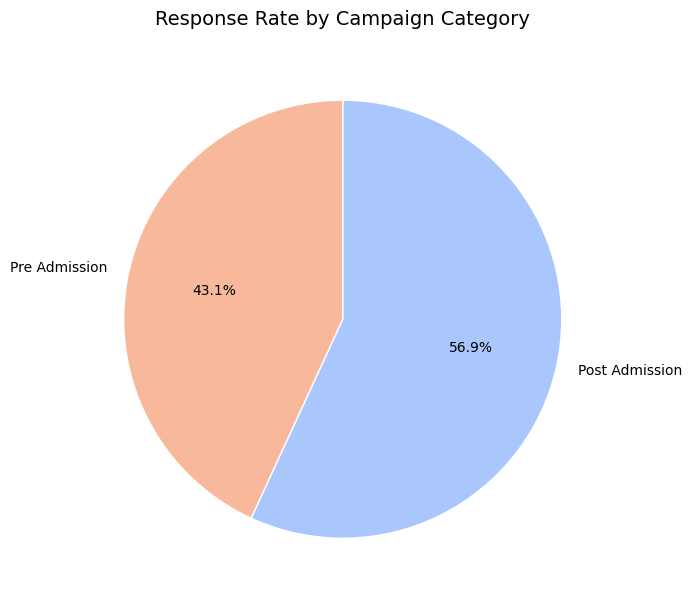

In [21]:
# Ensure Is_Response is calculated
df['Is_Response'] = df['Outcome_1'].isin(['Connected', 'Reschedule']).astype(int)

# Calculate response rate by category
response_rate = (
    df.groupby('Category')['Is_Response']
    .mean()
    .reset_index()
    .sort_values('Is_Response', ascending=False)
)

# Use Seaborn color palette
colors = sns.color_palette("coolwarm", n_colors=len(response_rate))

# Create pie chart
plt.figure(figsize=(7,7))
plt.pie(
    response_rate['Is_Response'],
    labels=response_rate['Category'],
    autopct='%1.1f%%',      # show percentages
    startangle=90,
    counterclock=False,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    colors=colors
)

plt.title('Response Rate by Campaign Category', fontsize=14, pad=15)
plt.tight_layout()
plt.show()

🎯 Insight Goal: Identify which campaign categories generate higher engagement and which underperform.

3. Effectiveness of First, Second, and Third Contact Attempts

C:\Users\sumai\AppData\Local\Temp\ipykernel_9916\376730039.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Attempt_Count', y='Is_Response', data=attempt_effectiveness, palette='viridis')


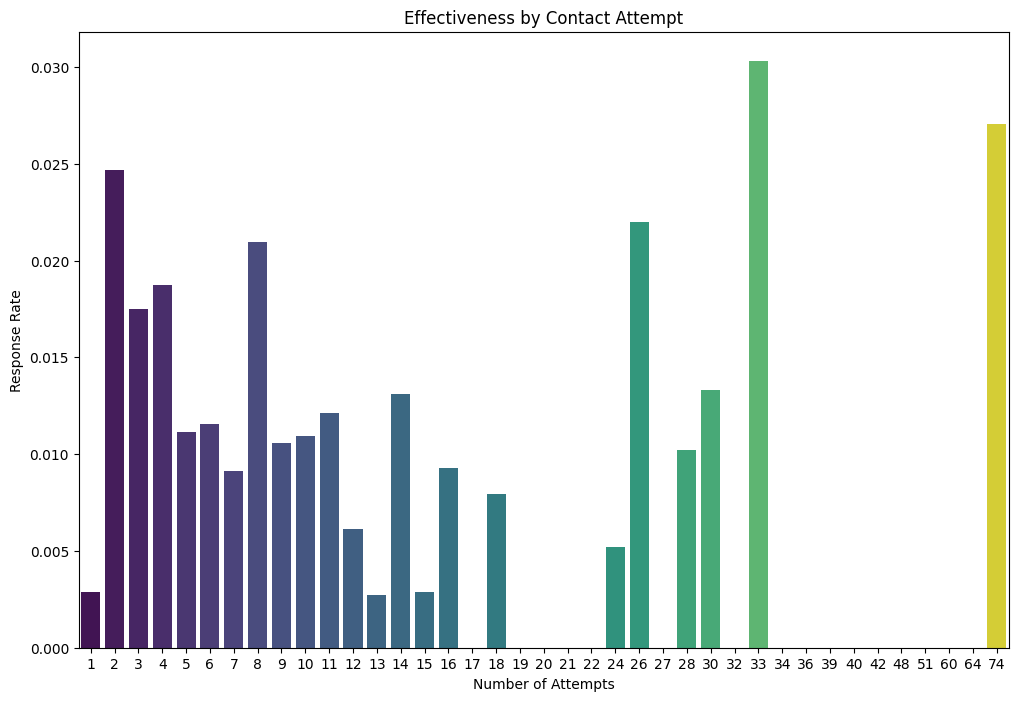

In [22]:
# Count number of outreach attempts per Reference_ID (assuming each attempt = one row)
attempts = df.groupby('Reference_ID').size().reset_index(name='Attempt_Count')

# Merge back for analysis
df_attempt = df.merge(attempts, on='Reference_ID', how='left')

attempt_effectiveness = df_attempt.groupby('Attempt_Count')['Is_Response'].mean().reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x='Attempt_Count', y='Is_Response', data=attempt_effectiveness, palette='viridis')
plt.title('Effectiveness by Contact Attempt')
plt.xlabel('Number of Attempts')
plt.ylabel('Response Rate')
plt.show()

🎯 Insight Goal: Determine if 1st, 2nd, or 3rd attempts are more effective, guiding future follow-up strategies.

4. Campaign Performance Overview

C:\Users\sumai\AppData\Local\Temp\ipykernel_9916\1362739763.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Campaign_ID', y='Is_Response', data=campaign_perf, palette='mako')


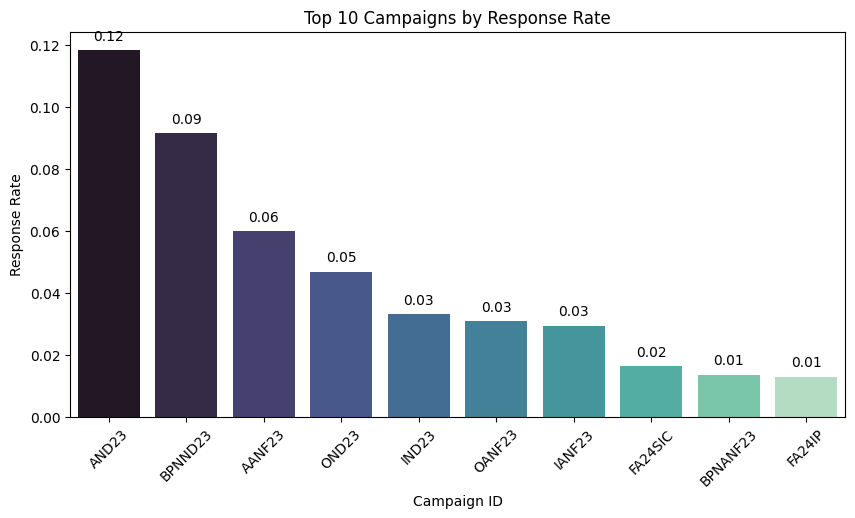

In [23]:
campaign_perf = df.groupby('Campaign_ID')['Is_Response'].mean().reset_index().sort_values('Is_Response', ascending=False).head(10)

plt.figure(figsize=(10,5))
barplot = sns.barplot(x='Campaign_ID', y='Is_Response', data=campaign_perf, palette='mako')

# Add values on top of each bar correctly
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(
        f"{height:.2f}",              # value to show
        (p.get_x() + p.get_width() / 2., height),  # position: center top of bar
        ha='center', va='bottom',
        fontsize=10,
        xytext=(0, 5),                # offset above bar
        textcoords='offset points'
    )

plt.title('Top 10 Campaigns by Response Rate')
plt.xlabel('Campaign ID')
plt.ylabel('Response Rate')
plt.xticks(rotation=45)
plt.show()

🎯 Insight Goal: Recognize which campaigns deliver the best ROI, and which may require redesign.

5. University/Region Performance (Segment-Level Insight)

C:\Users\sumai\AppData\Local\Temp\ipykernel_9916\3360909789.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Country', y='Is_Response', data=top_countries, palette='flare')


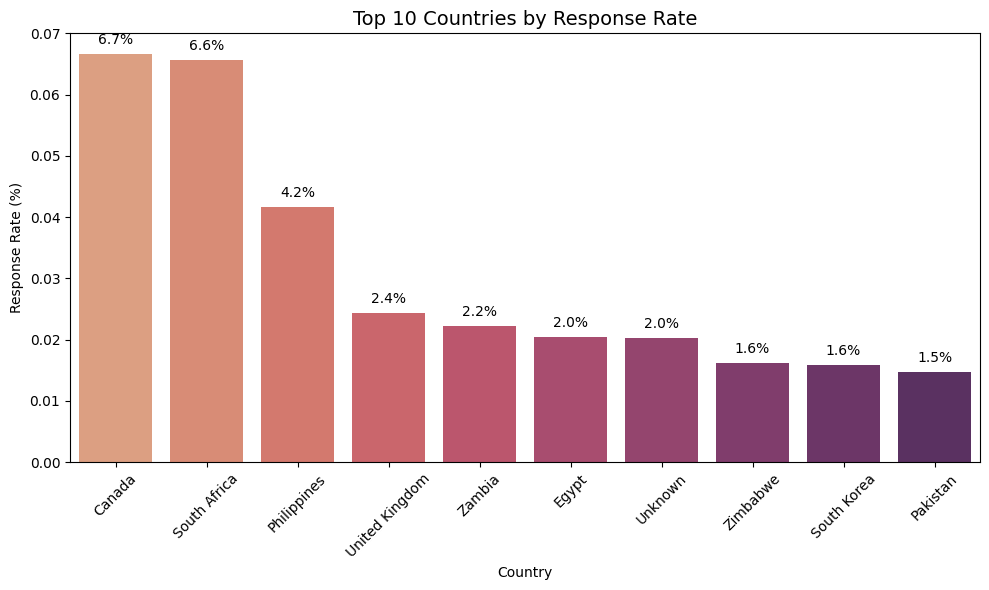

In [24]:
# Calculate response rate by country
region_perf = df.groupby('Country')['Is_Response'].mean().reset_index().sort_values('Is_Response', ascending=False)

# Select top 10 countries
top_countries = region_perf.head(10)

# Plot bar chart
plt.figure(figsize=(10,6))
barplot = sns.barplot(x='Country', y='Is_Response', data=top_countries, palette='flare')

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(
        f"{height*100:.1f}%",  # show as percentage
        (p.get_x() + p.get_width()/2., height),
        ha='center',
        va='bottom',
        xytext=(0,5),
        textcoords='offset points',
        fontsize=10
    )

plt.title('Top 10 Countries by Response Rate', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Response Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

🎯 Insight Goal: Understand which geographic segments or universities are more responsive to outreach.

6. Timing-Based Performance Shifts

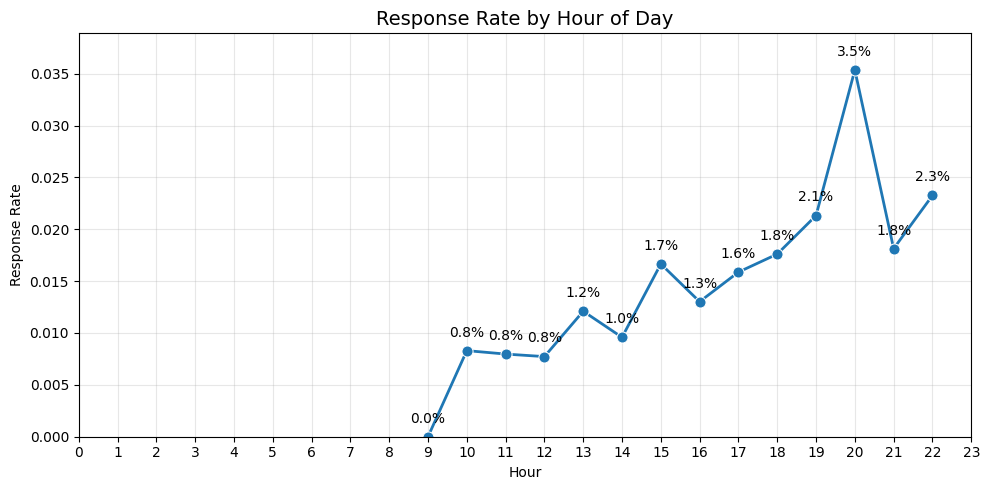

In [25]:
hourly_response = df.groupby('Hour')['Is_Response'].mean().reset_index()

plt.figure(figsize=(10,5))
ax = sns.lineplot(x='Hour', y='Is_Response', data=hourly_response, marker='o', linewidth=2, markersize=8)

# Show values at each point
for x, y in zip(hourly_response['Hour'], hourly_response['Is_Response']):
    ax.annotate(
        f"{y*100:.1f}%",       # convert to percentage
        xy=(x, y),
        xytext=(0, 8),          # vertical offset
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.title('Response Rate by Hour of Day', fontsize=14)
plt.xlabel('Hour')
plt.ylabel('Response Rate')
plt.xticks(range(0,24))
plt.ylim(0, 1.1*hourly_response['Is_Response'].max())  # give some headroom for text
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

🎯 Insight Goal: Discover which hours yield highest engagement, optimizing call or message timing.

7. Conversion Analysis (if Status indicates success)

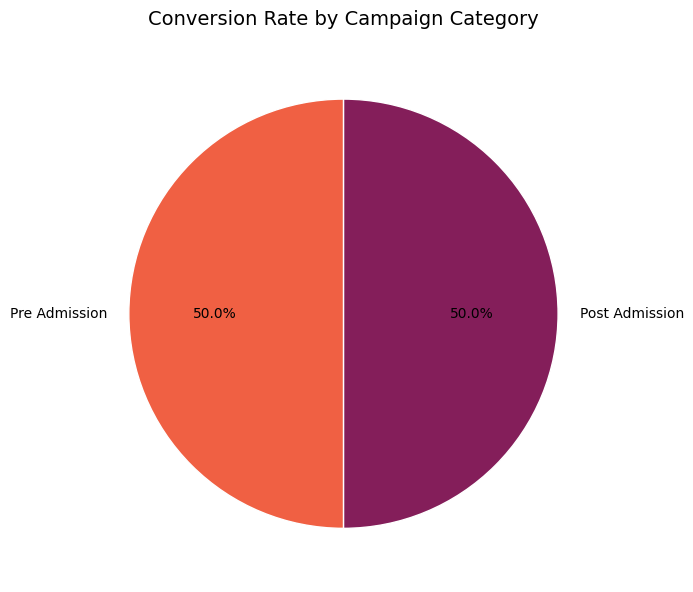

In [26]:
# Calculate conversion rate by category
df['Is_Converted'] = df['Status'].isin(['Completed', 'Enrolled']).astype(int)
conversion_rate = (
    df.groupby('Category')['Is_Converted']
    .mean()
    .reset_index()
    .sort_values('Is_Converted', ascending=False)
)

# Get Seaborn rocket palette as Matplotlib colors
colors = sns.color_palette("rocket", n_colors=len(conversion_rate))

# Create pie chart
plt.figure(figsize=(7,7))
plt.pie(
    conversion_rate['Is_Converted'],
    labels=conversion_rate['Category'],
    autopct='%1.1f%%',  # show percentage values
    startangle=90,
    counterclock=False,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    colors=colors
)

plt.title('Conversion Rate by Campaign Category', fontsize=14, pad=15)
plt.tight_layout()
plt.show()

🎯 Insight Goal: See which outreach categories directly lead to successful conversions.

## Optional: Extra EDA

1. Phone Number / Contact Analysis

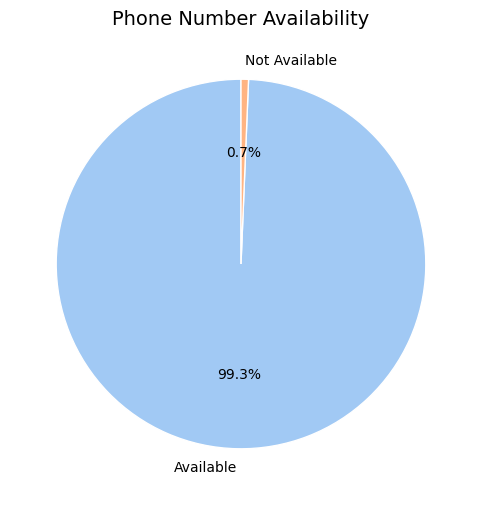

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to classify phone numbers
def classify_phone(x):
    try:
        x = str(x).strip()
        if x.isdigit() and len(x) > 0:  # any numeric value is valid
            return 'Available'
        else:
            return 'Not Available'
    except:
        return 'Not Available'

# Apply classification
df['Phone_Status'] = df['Phone_Number'].apply(classify_phone)

# Count Available vs Not Available
phone_counts = df['Phone_Status'].value_counts().reset_index()
phone_counts.columns = ['Phone_Status', 'Count']

# Pie chart
plt.figure(figsize=(6,6))
colors = sns.color_palette("pastel", len(phone_counts))
plt.pie(
    phone_counts['Count'],
    labels=phone_counts['Phone_Status'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor':'white'}
)
plt.title('Phone Number Availability', fontsize=14)
plt.show()


Insights:

Shows proportion of contacts missing phone numbers.

Highlights whether missing numbers impact response rates.

2. Escalation Required / Status Analysis

C:\Users\sumai\AppData\Local\Temp\ipykernel_9916\261068134.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Escalation_Required', y='Is_Converted', data=escalation_conv, palette='cool')


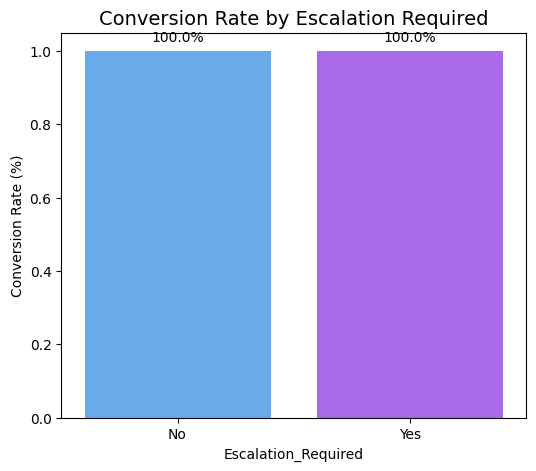

In [28]:
# Conversion rate by Escalation Required
df['Is_Converted'] = df['Status'].isin(['Completed', 'Enrolled']).astype(int)
escalation_conv = df.groupby('Escalation_Required')['Is_Converted'].mean().reset_index()

plt.figure(figsize=(6,5))
barplot = sns.barplot(x='Escalation_Required', y='Is_Converted', data=escalation_conv, palette='cool')
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f"{height*100:.1f}%", (p.get_x() + p.get_width()/2., height), ha='center', va='bottom', xytext=(0,5), textcoords='offset points')
plt.title('Conversion Rate by Escalation Required', fontsize=14)
plt.ylabel('Conversion Rate (%)')
plt.show()


Insights:

Determines if campaigns flagged for escalation have higher/lower conversion.

3. Segmentation by Intake / University Tier

C:\Users\sumai\AppData\Local\Temp\ipykernel_9916\602205019.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='University_Tier', y='Is_Response', data=tier_response, palette='Set2')


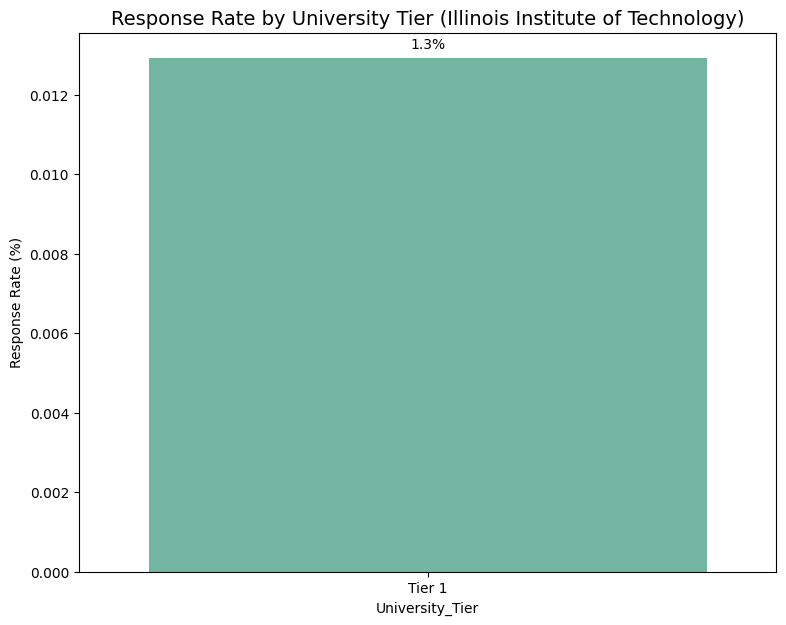

In [29]:
# Example: create University Tier mapping (you can customize)
tier_mapping = {
    'Illinois Institute of Technology': 'Tier 1',
    'Other University': 'Tier 2'  # add as needed
}
df['University_Tier'] = df['University_x'].map(tier_mapping).fillna('Tier 2')

# Response rate by University Tier
tier_response = df.groupby('University_Tier')['Is_Response'].mean().reset_index()

plt.figure(figsize=(9,7))
barplot = sns.barplot(x='University_Tier', y='Is_Response', data=tier_response, palette='Set2')
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f"{height*100:.1f}%", (p.get_x() + p.get_width()/2., height), ha='center', va='bottom', xytext=(0,5), textcoords='offset points')
plt.title('Response Rate by University Tier (Illinois Institute of Technology)', fontsize=14)
plt.ylabel('Response Rate (%)')
plt.show()


Insights:

Shows which tier of universities is more responsive, useful for prioritization.

4. Campaign Category vs Attempt Effectiveness

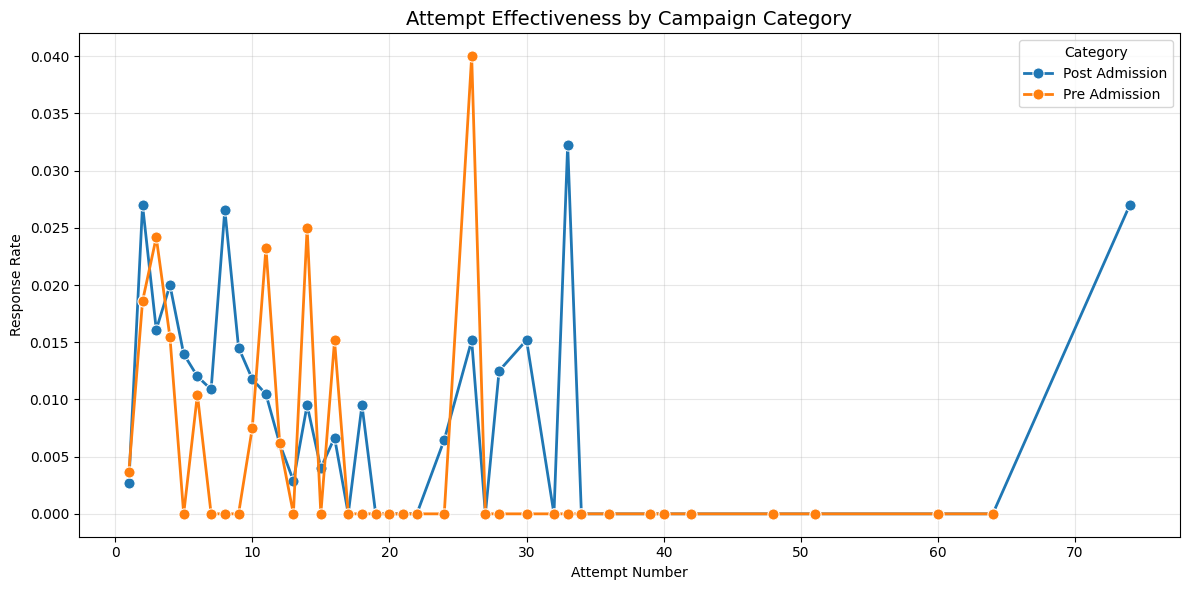

In [30]:
# Step 1: Calculate mean response rate per Category and Attempt_Count
category_attempt = df_attempt.groupby(['Category','Attempt_Count'])['Is_Response'].mean().reset_index()

# Step 2: Plot the line chart
plt.figure(figsize=(12,6))

sns.lineplot(
    x='Attempt_Count',
    y='Is_Response',
    hue='Category',
    data=category_attempt,
    marker='o',
    linewidth=2,
    markersize=8
)

plt.title('Attempt Effectiveness by Campaign Category', fontsize=14)
plt.xlabel('Attempt Number')
plt.ylabel('Response Rate')
plt.grid(alpha=0.3)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

Insights:

Identifies which categories benefit from additional contact attempts.

Helps plan follow-up strategy per campaign type.

Statistics

In [31]:
df.describe()

,Reference_ID,Received_At,Hour,Is_Response,Is_Converted
count,3.971700e+04,39717,39717.000000,39717.000000,39717.0
mean,1.359938e+07,2024-05-25 15:53:44.068005888,14.490344,0.012916,1.0
min,1.234500e+04,2023-04-28 12:15:19,9.000000,0.000000,1.0
25%,4.232080e+05,2024-04-01 11:34:08,12.000000,0.000000,1.0
50%,4.467950e+05,2024-06-26 21:29:18,14.000000,0.000000,1.0
75%,4.741710e+05,2024-10-15 17:34:24,17.000000,0.000000,1.0
max,9.745563e+10,2024-12-24 16:36:17,22.000000,1.000000,1.0
std,7.381890e+08,NaN,2.717475,0.112915,0.0


Descriptive Statistics

In [32]:
# Clean, formatted descriptive statistics
desc_stats = df[['Hour', 'Is_Response', 'Is_Converted']].describe().T
desc_stats['missing'] = df[['Hour', 'Is_Response', 'Is_Converted']].isna().sum()
desc_stats['missing_%'] = round((desc_stats['missing'] / len(df)) * 100, 2)
print(desc_stats)


                count       mean       std  min   25%   50%   75%   max  \
Hour          39717.0  14.490344  2.717475  9.0  12.0  14.0  17.0  22.0   
Is_Response   39717.0   0.012916  0.112915  0.0   0.0   0.0   0.0   1.0   
Is_Converted  39717.0   1.000000  0.000000  1.0   1.0   1.0   1.0   1.0   

              missing  missing_%  
Hour                0        0.0  
Is_Response         0        0.0  
Is_Converted        0        0.0  


Time-Based Statistics

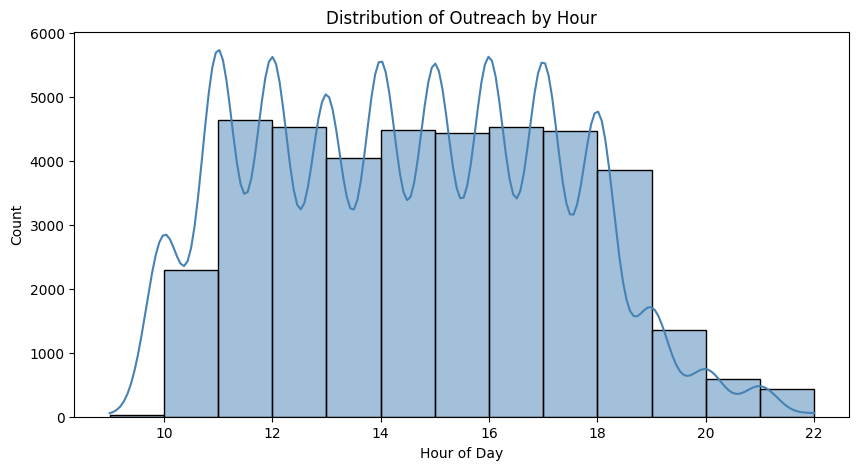

C:\Users\sumai\AppData\Local\Temp\ipykernel_9916\1281223526.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day', y='Outreach_Count', data=weekday_stats, palette='viridis')


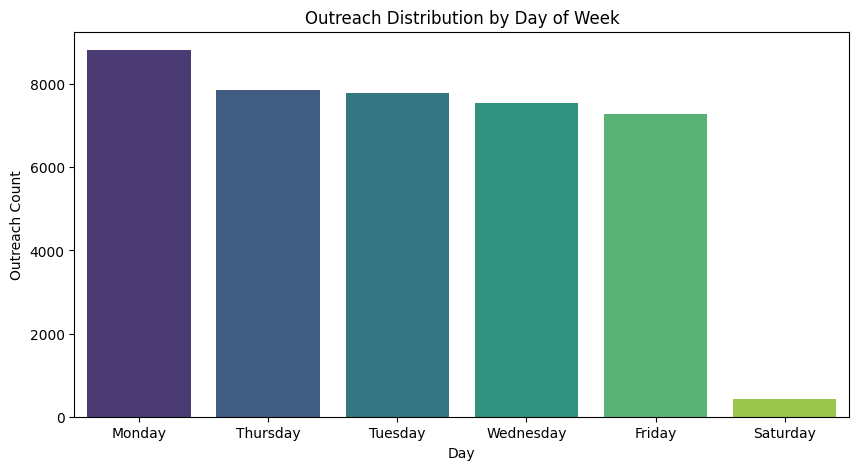

C:\Users\sumai\AppData\Local\Temp\ipykernel_9916\1281223526.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Is_Response', data=df, palette='coolwarm')


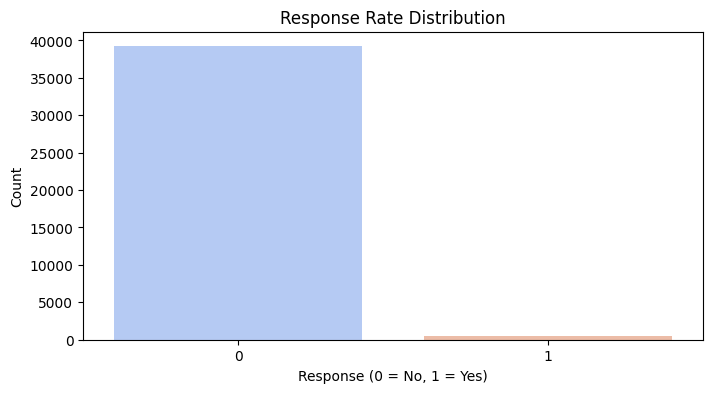

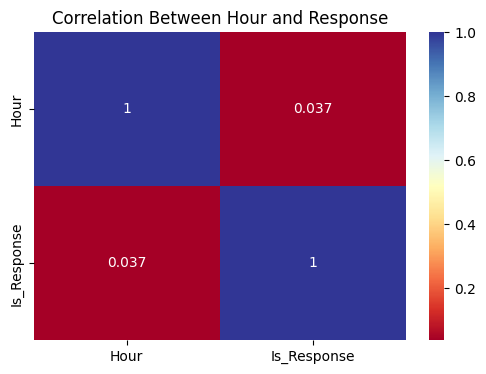

In [35]:
# Day of week distribution
weekday_stats = df['Weekday'].value_counts().reset_index()
weekday_stats.columns = ['Day', 'Outreach_Count']

# Hourly trend
hourly_stats = df['Hour'].value_counts().sort_index().reset_index()
hourly_stats.columns = ['Hour', 'Outreach_Count']

# (a) Distribution of Outreach Hour
plt.figure(figsize=(10,5))
sns.histplot(df['Hour'], bins=13, kde=True, color='steelblue')
plt.title('Distribution of Outreach by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()
# (b) Weekly Outreach Pattern
plt.figure(figsize=(10,5))
sns.barplot(x='Day', y='Outreach_Count', data=weekday_stats, palette='viridis')
plt.title('Outreach Distribution by Day of Week')
plt.xlabel('Day')
plt.ylabel('Outreach Count')
plt.show()
# (c) Response Rate Distribution
plt.figure(figsize=(8,4))
sns.countplot(x='Is_Response', data=df, palette='coolwarm')
plt.title('Response Rate Distribution')
plt.xlabel('Response (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()
# (d)Correlation & Relationship Insights
plt.figure(figsize=(6,4))
sns.heatmap(df[['Hour', 'Is_Response']].corr(), annot=True, cmap='RdYlBu')
plt.title('Correlation Between Hour and Response')
plt.show()


## Covered:

Main Insights Covered

Outreach Volume & Timing Trends → done (monthly, weekday, hourly trends)

Response Rate by Category or Campaign → done (bar/pie charts)

Effectiveness of Contact Attempts → done (1st, 2nd, 3rd attempts)

Campaign Performance Overview → done (top campaigns by response/conversion)

University/Region Performance → done (country, university tier)

Timing-Based Performance Shifts → done (hourly trends, seasonal/monthly trends)

Conversion Analysis → done (Status → Is_Converted)

Optional Insights Covered

Phone number/contact analysis → done (available vs not available)

Escalation / Status analysis → done (conversion vs escalation)

Segmentation by Intake / University Tier → done (Tier 1 vs Tier 2)

Campaign Category vs Attempt Effectiveness → done (line chart per category per attempt)

## EDA is Complete !

Exporting the Dataset including new columns 

In [36]:
df.to_csv("Cleaned_Outreach_Campaign_Applicants_FinalData.csv", index=False)